<a href="https://colab.research.google.com/github/JOTHEESS/MachineLearning_Projects/blob/main/ML_Project_Logistic_Regression_Loan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving logistic_regression.csv to logistic_regression (1).csv


In [ ]:
data = pd.read_csv('logistic_regression.csv')
data.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
print(data.shape)   ##shape attribute is not called as a function

(396030, 27)


In [ ]:
data.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
data.loan_status.value_counts(normalize=True)*100  #normalise=true, wil give perventage distribution insted counts

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

<ipython-input-117-de4f6f29f6de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')


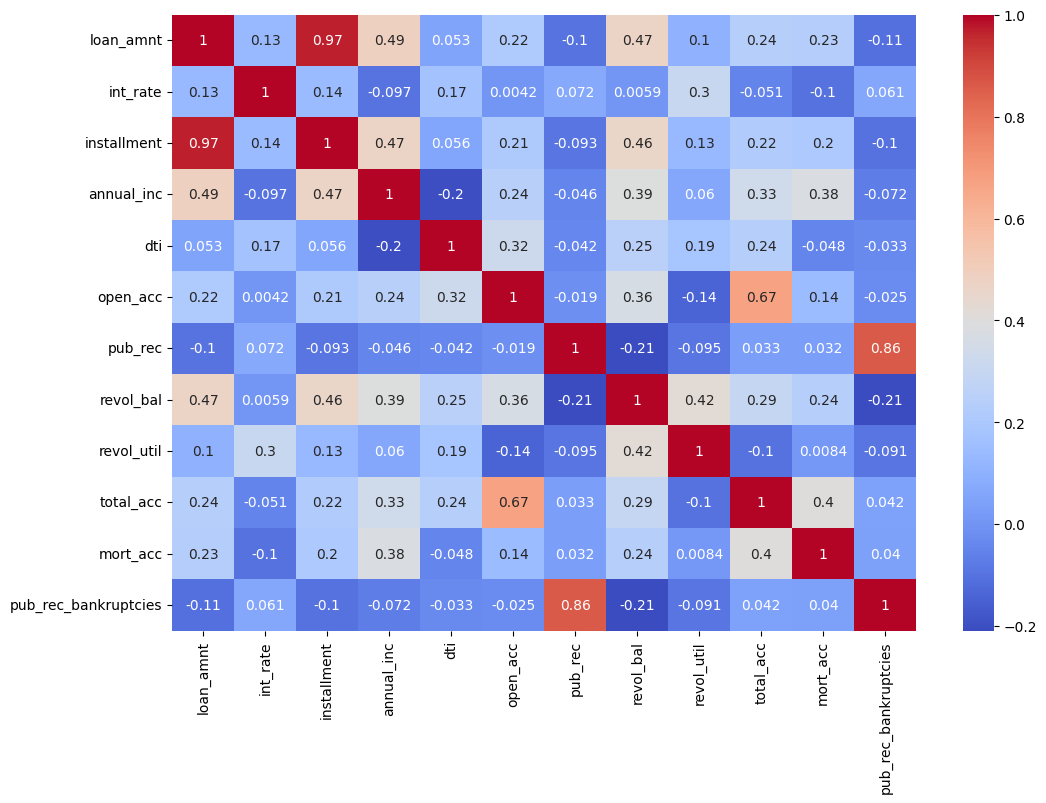

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()




```
# We noticed almost perfect correlation between "loan_amnt" the "installment" feature.So, we can drop either one of those columns.>
```



In [ ]:
data.drop(columns =['installment'],axis=1 ,inplace=True)

<ipython-input-119-de4f6f29f6de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')


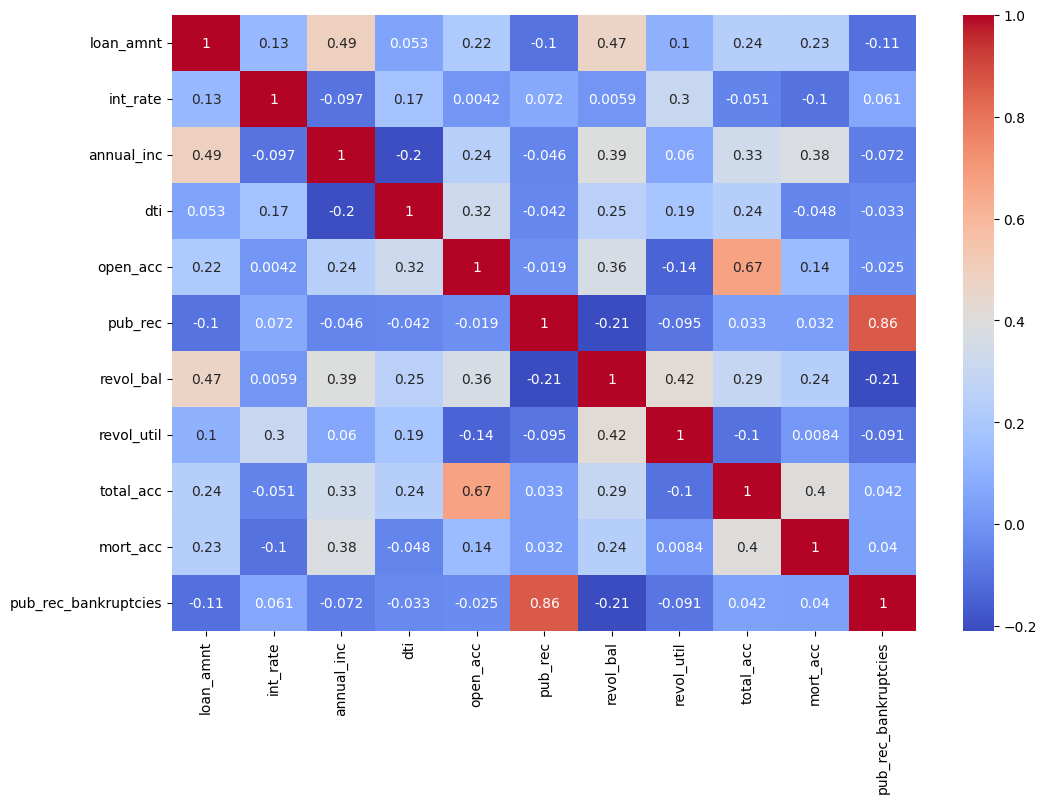

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

Data Exploration

In [ ]:
data.groupby(by='loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0




```
# customers who fully paid have less mean amount  compared to people are charged



In [ ]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64



```
# combining miniroty claases under 'other'
```



In [ ]:
data.loc[(data.home_ownership =='ANY') | (data.home_ownership =='NONE') , 'home_ownership' ] ='OTHER'
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [ ]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64



```
# Coverting string to date-time format.
```



In [ ]:

data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])



```
# Saw some issues in title (Looks like it was filled manually and needs some fixing
```



In [ ]:
data['title']= data.title.str.lower()
data['title'].value_counts()[:10]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: title, dtype: int64

VISULAISATION

<ipython-input-126-62191b24ebc8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


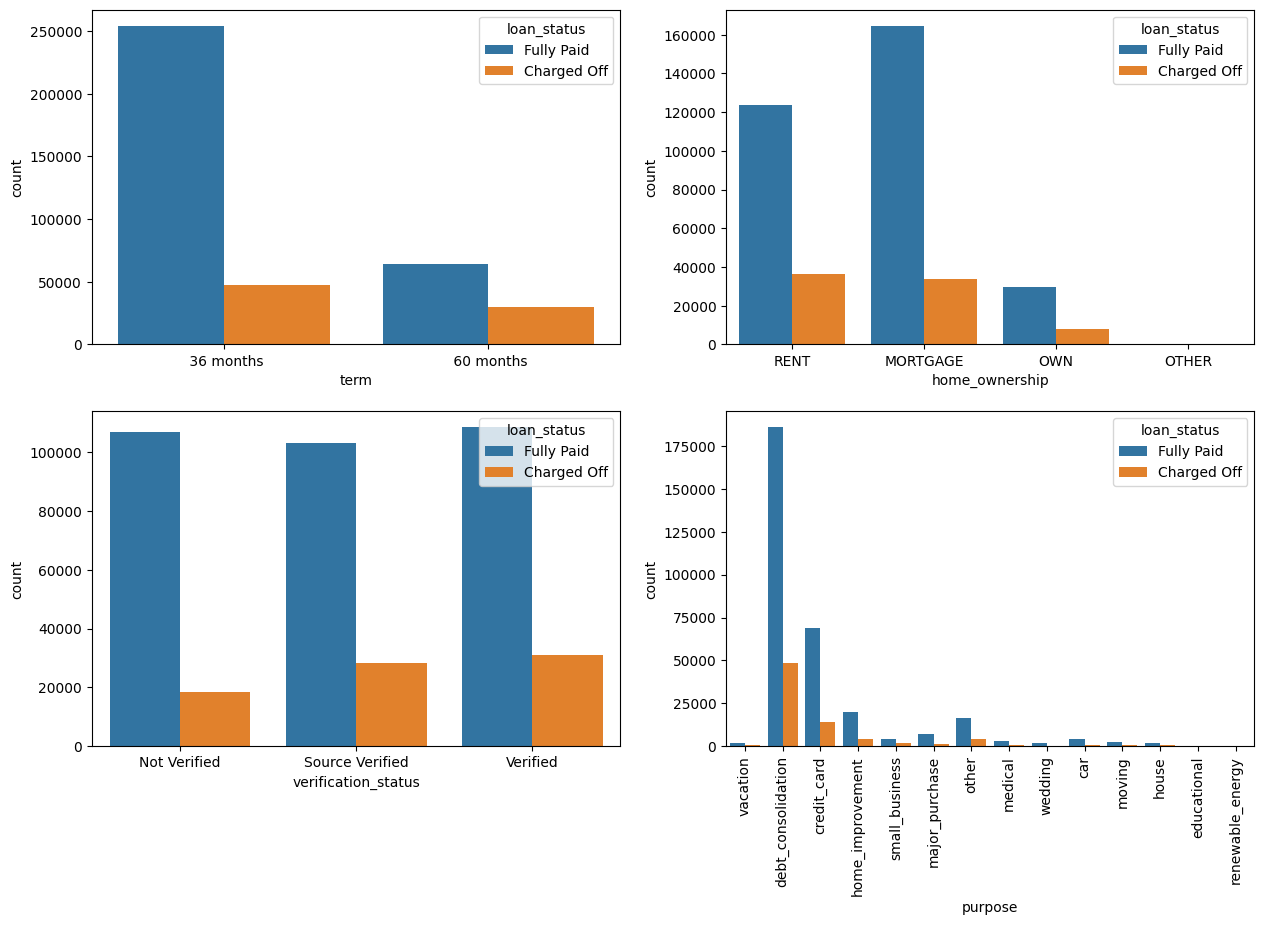

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

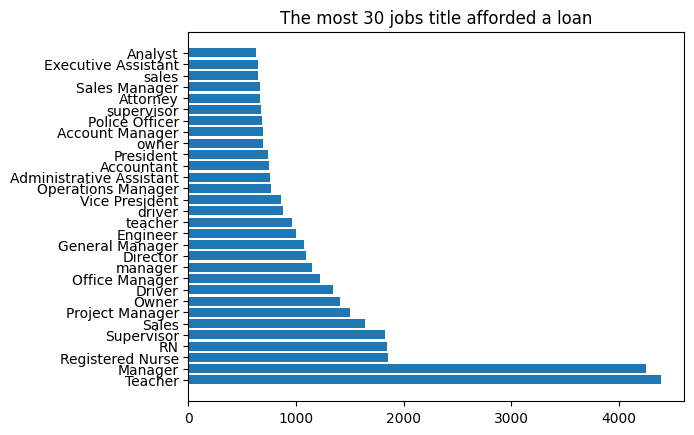

In [ ]:
plt.barh( data.emp_title.value_counts()[:30].index , data.emp_title.value_counts()[:30])   #bar(h) for horizoantal bar graph
plt.title("The most 30 jobs title afforded a loan")
plt.show()



```
# teacher and manger took more/most of loans



FEATURE ENGINNERING



```
# to convert numerical values into binary values based on a certain condition.
```



In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    else:
        return 1


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    else:
        return 1

In [ ]:
data['pub_rec']= data.pub_rec.apply(pub_rec)
data['mort_acc']= data.pub_rec.apply(mort_acc)
data['pub_rec_bankruptcies']= data.pub_rec.apply(pub_rec_bankruptcies)


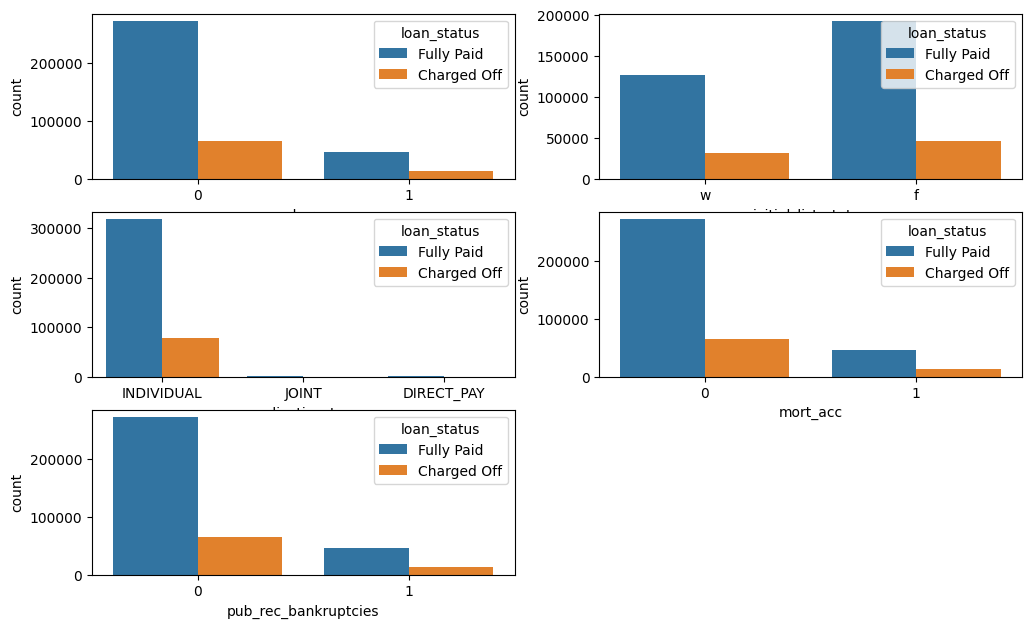

In [ ]:
plt.figure (figsize=(12,15))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec', data=data , hue='loan_status')


plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

plt.show()


In [ ]:
#mapping of target variable
data['loan_status'] = data['loan_status'].map({'Fully Paid':0,'Charged Off' :1 })

In [ ]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
address                 0.000000
dtype: float64

Mean Target Imputation

In [ ]:
data.groupby(by='total_acc').mean()

<ipython-input-133-05a6a8313bf2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by='total_acc').mean()


,loan_amnt,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,,
2.0,6672.222222,15.801111,64277.777778,0.222222,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000
3.0,6042.966361,15.615566,41270.753884,0.220183,6.502813,2.611621,0.033639,3382.807339,49.991022,0.033639,0.033639
4.0,7587.399031,15.069491,42426.565969,0.214055,8.411963,3.324717,0.033118,4874.231826,58.477400,0.033118,0.033118
5.0,7845.734714,14.917564,44394.098003,0.203156,10.118328,3.921598,0.055720,5475.253452,56.890311,0.055720,0.055720
6.0,8529.019843,14.651752,48470.001156,0.215874,11.222542,4.511119,0.076634,6546.374957,57.812483,0.076634,0.076634
...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,66000.000000,1.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,0.000000,0.000000
129.0,25000.000000,7.890000,200000.000000,0.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,0.000000,0.000000
135.0,24000.000000,15.410000,82000.000000,0.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,0.000000,0.000000


In [ ]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

<ipython-input-135-584fae57b31c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = data.groupby(by='total_acc').mean().mort_acc


In [ ]:
data['mort_acc'] = data.apply(lambda x: total_acc_avg[x['total_acc']].round() if pd.isna(x['mort_acc']) else x['mort_acc'], axis=1)


In [ ]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
address                 0.000000
dtype: float64

In [ ]:
data.shape


(396030, 26)

In [ ]:
# Dropping rows with null values -
data.dropna(inplace=True)

In [ ]:
# Remaining no. of rows -
data.shape

(371126, 26)

outlier detection & treatment

In [ ]:
numerical_data = data.select_dtypes(include='number')
len(numerical_data.columns)

12

In [ ]:
num_columns = numerical_data.columns

In [ ]:
for col in num_columns:
  mean = data[col].mean()
  std = data[col].std()

  upper_limit = mean+3*std
  lower_limit = mean-3*std

  data = data[(data[col] < upper_limit) & (data[col] > lower_limit)]


#It filters to keep only the rows where the column value is within the specified upper and lower limits.

In [ ]:
  data.shape

(355005, 26)

data preproceesing


In [ ]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

#converting from string for the training

In [ ]:
list_status = {'w': 0, 'f': 1}
data['initial_list_status'] = data.initial_list_status.map(list_status)

In [ ]:
# Let's fetch ZIP from address and then drop the remaining details -
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [ ]:
data['zip_code'].value_counts(normalize=True)*100

70466    14.378671
30723    14.282616
22690    14.269095
48052    14.125153
00813    11.611949
29597    11.537302
05113    11.517021
93700     2.773764
11650     2.771229
86630     2.733201
Name: zip_code, dtype: float64

In [ ]:
 #dropping few columns
data.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade','address', 'earliest_cr_line', 'emp_length'],axis=1, inplace=True)

one - hot encoding

In [ ]:
dummies = ['purpose',  'grade', 'verification_status', 'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

#The pd.get_dummies() function in pandas is used for one-hot encoding categorical variables.

In [ ]:
data.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,...,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,...,0,0,0,1,0,1,0,0,0,1
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,...,0,0,0,0,0,1,0,0,0,1
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
data.shape

(355005, 41)

Data Preparation for Modeling -

In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
accuracy = (logreg.score(X_test, y_test))
print(f'Accuracy: {accuracy}')

Accuracy: 0.8389044337195546


Classification Report -

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     85797
           1       0.70      0.31      0.42     20705

    accuracy                           0.84    106502
   macro avg       0.77      0.64      0.67    106502
weighted avg       0.82      0.84      0.81    106502



AU ROC

In [ ]:
logit_roc_auc = roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print (f'Area under the ROC Curve: {logit_roc_auc}')

Area under the ROC Curve: 0.7878212054868781


ROC

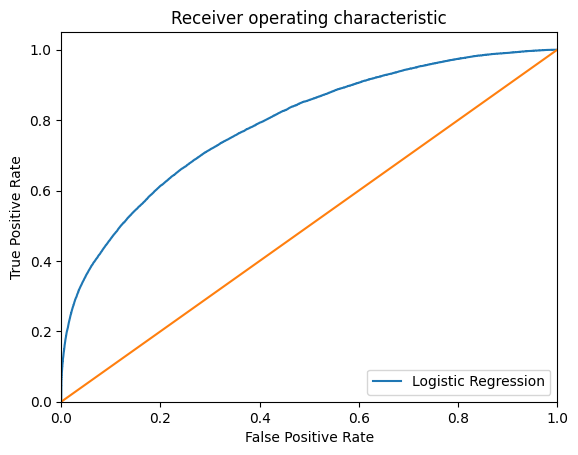

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
#extracts the predicted probabilities for the positive class

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Multicollinearity check using Variance Inflation Factor (VIF) -

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X)[:5]



```
# Remove the top 5 columns - that has vix >5
```



In [ ]:
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(logreg, X, y, cv=kfold, scoring='accuracy', n_jobs=-1))
print("Cross Validation accuracy: {:.3f}".format(accuracy))

Cross Validation accuracy: 0.840


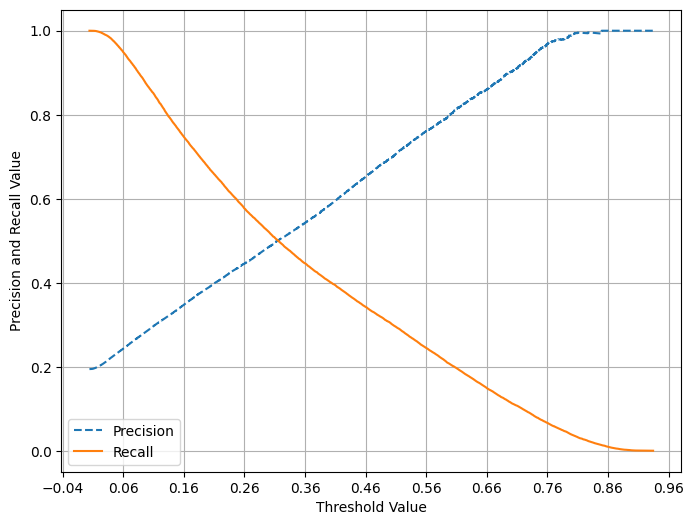

In [ ]:
pred_proba_c1 = logreg.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_c1)
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
threshold_boundary = thresholds.shape[0]

# Plot precision and recall as a function of the threshold value
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='Precision')
plt.plot(thresholds, recalls[:threshold_boundary], label='Recall')

# Set x-axis ticks
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

# Add labels, legend, and grid
plt.xlabel('Threshold Value')
plt.ylabel('Precision and Recall Value')
plt.legend()
plt.grid(True)
plt.show()
